# To classify whether the tumor is benign (B) or malignant (M).

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("C:\\Users\\rodri\\Documents\\Data Science\\Kaggle\\Breast Cancer\\Input\\breast-cancer-wisconsin-data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Get the shape of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 569
Number of columns: 32


In [8]:
# Display the data types of each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [10]:
# Count the unique values in the "diagnosis" column
print(df['diagnosis'].nunique())

2


In [13]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

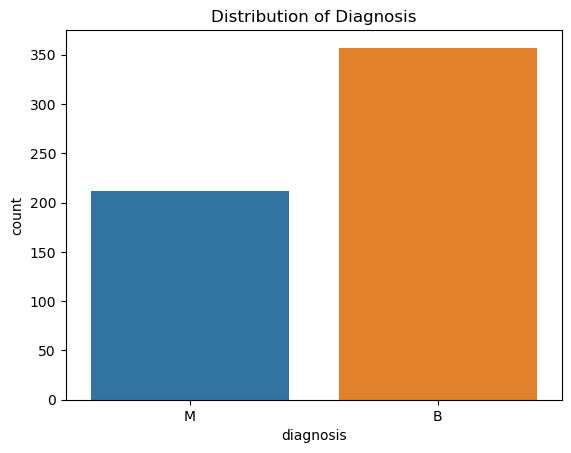

In [14]:
# Plot the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

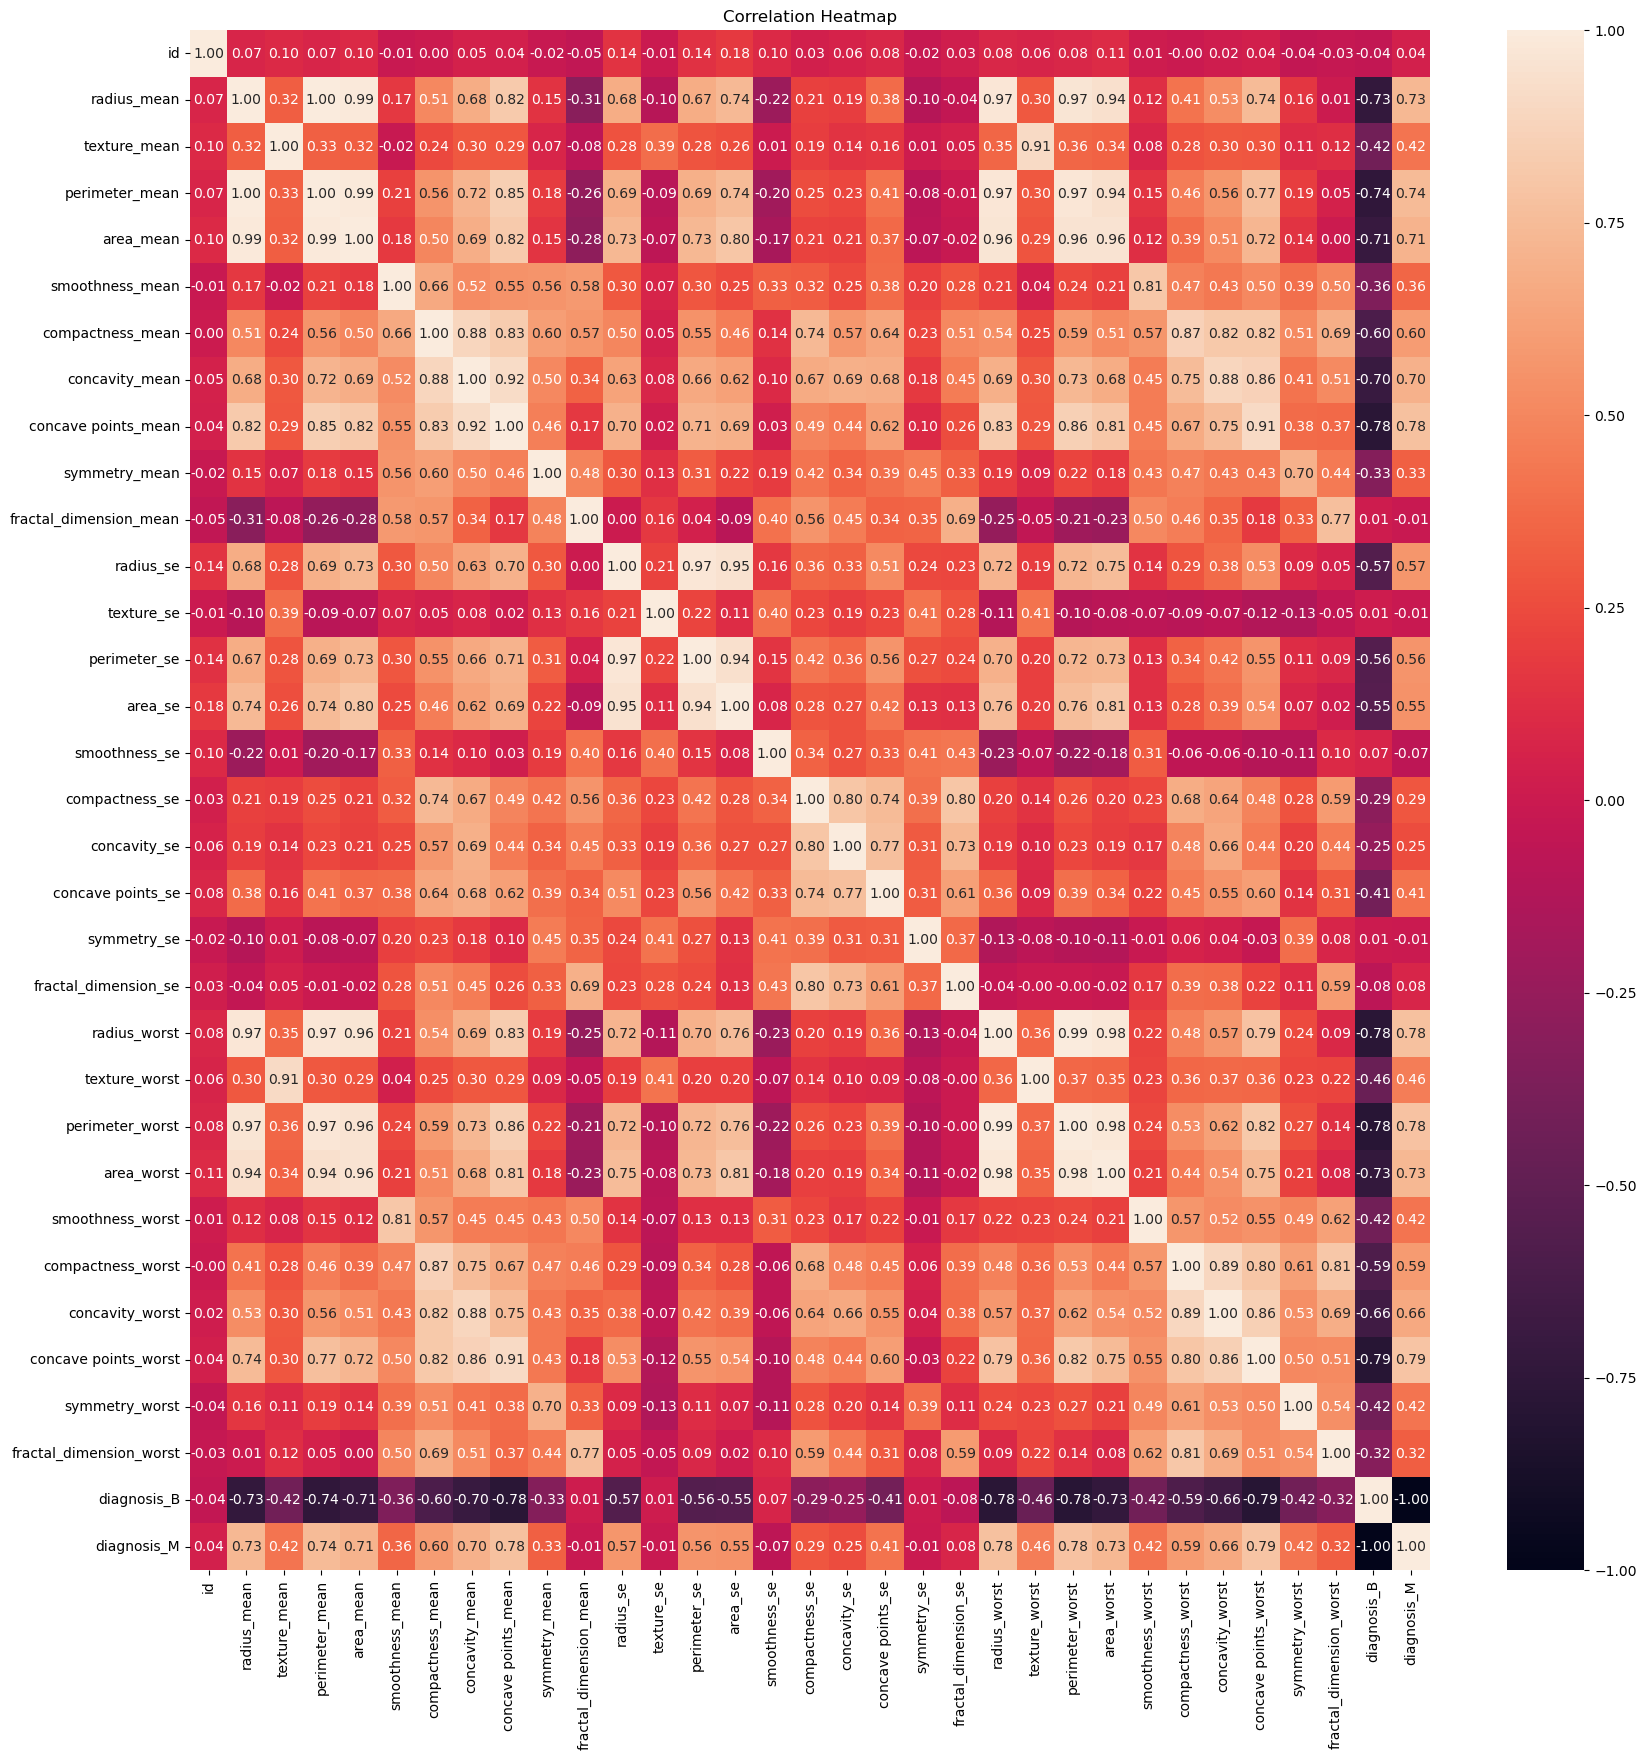

In [15]:
# One-hot encode the 'diagnosis' column
df_encoded = pd.get_dummies(df, columns=['diagnosis'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

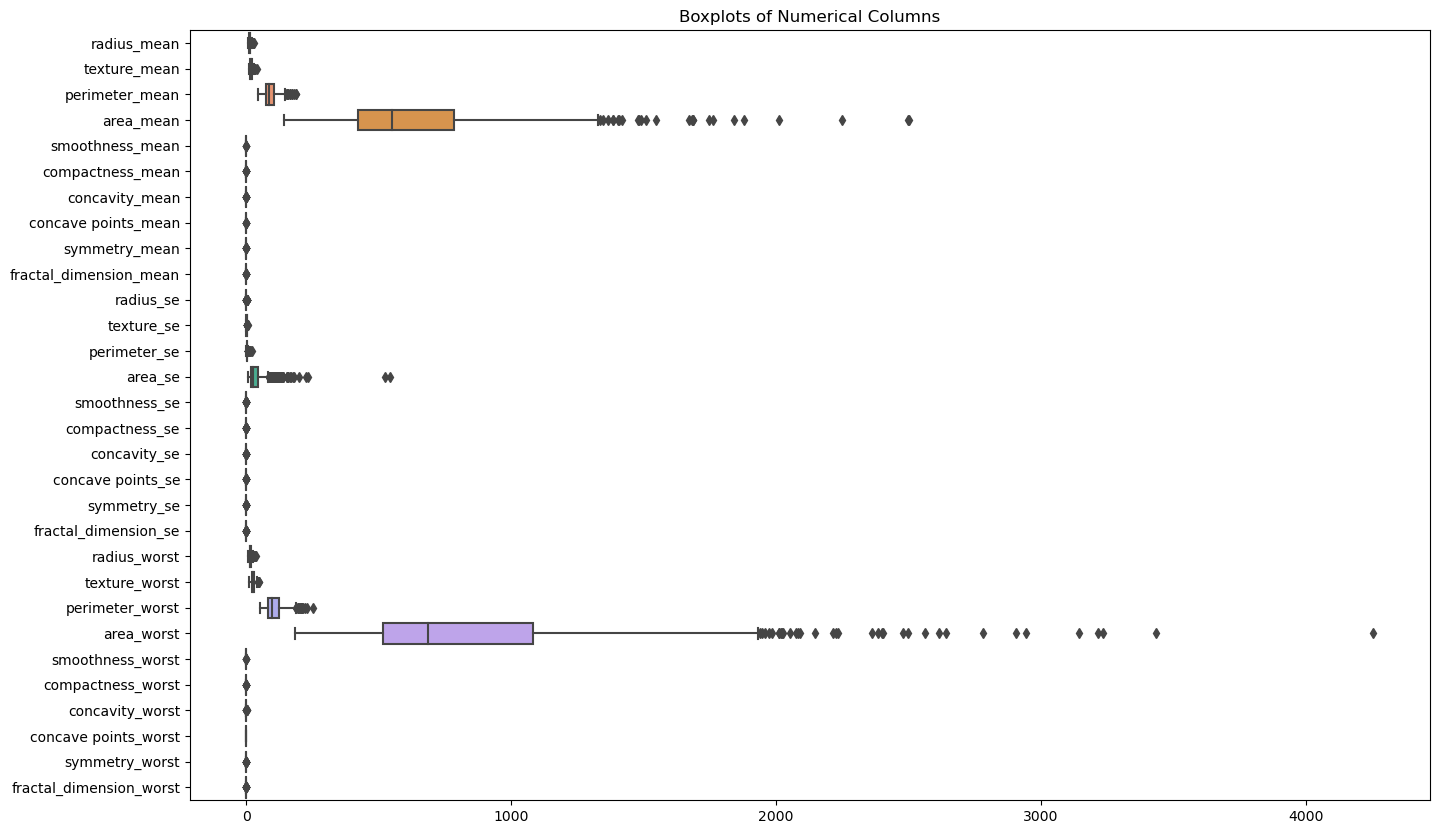

In [16]:
# Plot boxplots for numerical columns
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.drop(columns=['id', 'diagnosis']), orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

In [22]:
# Plot boxplots for numerical columns using Plotly
fig = px.box(df.drop(columns=['id', 'diagnosis']))
fig.update_layout(title='Boxplots of Numerical Columns')
fig.show()

In [24]:
# Plot distribution of 'radius_mean' for each diagnosis using Plotly
fig = px.histogram(df, x='radius_mean', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of radius_mean for Benign and Malignant Tumors', xaxis_title='radius_mean', yaxis_title='Count')
fig.show()

In [25]:
# Plot distribution of 'perimeter_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='perimeter_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of perimeter_worst for Benign and Malignant Tumors', xaxis_title='perimeter_worst', yaxis_title='Count')
fig.show()

In [27]:
# Plot distribution of 'concavity_se' for each diagnosis using Plotly
fig = px.histogram(df, x='concavity_se', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of concavity_se for Benign and Malignant Tumors', xaxis_title='concavity_se', yaxis_title='Count')
fig.show()

In [28]:
# Plot distribution of 'area_mean' for each diagnosis using Plotly
fig = px.histogram(df, x='area_mean', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of area_mean for Benign and Malignant Tumors', xaxis_title='area_mean', yaxis_title='Count')
fig.show()

In [29]:
# Plot distribution of 'symmetry_se' for each diagnosis using Plotly
fig = px.histogram(df, x='symmetry_se', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of symmetry_se for Benign and Malignant Tumors', xaxis_title='symmetry_se', yaxis_title='Count')
fig.show()

In [31]:
# Plot distribution of 'texture_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='texture_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of texture_worst for Benign and Malignant Tumors', xaxis_title='texture_worst', yaxis_title='Count')
fig.show()

In [32]:
# Plot distribution of 'smoothness_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='smoothness_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of smoothness_worst for Benign and Malignant Tumors', xaxis_title='smoothness_worst', yaxis_title='Count')
fig.show()

In [33]:
# Plot distribution of 'concave points_mean' for each diagnosis using Plotly
fig = px.histogram(df, x='concave points_mean', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of concave points_mean for Benign and Malignant Tumors', xaxis_title='concave points_mean', yaxis_title='Count')
fig.show()

In [35]:
# Plot distribution of 'area_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='area_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of area_worst for Benign and Malignant Tumors', xaxis_title='area_worst', yaxis_title='Count')
fig.show()

In [36]:
# Plot distribution of 'concavity_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='concavity_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of concavity_worst for Benign and Malignant Tumors', xaxis_title='concavity_worst', yaxis_title='Count')
fig.show()

In [38]:
# Plot distribution of 'perimeter_mean' for each diagnosis using Plotly
fig = px.histogram(df, x='perimeter_mean', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of perimeter_mean for Benign and Malignant Tumors', xaxis_title='perimeter_mean', yaxis_title='Count')
fig.show()

In [40]:
# Plot distribution of 'fractal_dimension_worst' for each diagnosis using Plotly
fig = px.histogram(df, x='fractal_dimension_worst', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of fractal_dimension_worst for Benign and Malignant Tumors', xaxis_title='fractal_dimension_worst', yaxis_title='Count')
fig.show()

In [41]:
# Plot distribution of 'smoothness_se' for each diagnosis using Plotly
fig = px.histogram(df, x='smoothness_se', color='diagnosis', marginal='box', nbins=30)
fig.update_layout(title='Distribution of smoothness_se for Benign and Malignant Tumors', xaxis_title='smoothness_se', yaxis_title='Count')
fig.show()

In [44]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

In [46]:
train= df.drop(columns=['id'],axis=1)
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
train["diagnosis"] = train["diagnosis"].replace({'M':1,'B':2})

In [48]:
X= train.drop(columns=['diagnosis'],axis=1)
y= train['diagnosis']

In [49]:
from sklearn.preprocessing import MinMaxScaler

X_train=X
y_train=y

MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [50]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2024)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (455, 30)
Shape of X_eval:  (114, 30)
Shape of y_train:  (455,)
Shape of y_eval (114,)


In [51]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB

In [52]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_eval, y_train, y_eval)
print(models)

 28%|██▊       | 8/29 [00:00<00:00, 23.15it/s]  File "C:\Users\rodri\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rodri\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rodri\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rodri\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
100%|██████████| 29/29 [00:01<00:00, 19.74it/s]

[LightGBM] [Info] Number of positive: 289, number of negative: 166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4543
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635165 -> initscore=0.554439
[LightGBM] [Info] Start training from score 0.554439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [53]:
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)


        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [57]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np

clf1 = LogisticRegression()
clf2 = LGBMClassifier()
clf3 = SVC()
clf4 = PassiveAggressiveClassifier()

In [58]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf2,clf3,clf4),meta_model = clf1) 

In [59]:
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)
stacking_model.fit(X_train.values , y_train.values)

[LightGBM] [Info] Number of positive: 227, number of negative: 137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3648
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623626 -> initscore=0.504969
[LightGBM] [Info] Start training from score 0.504969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 235, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3648
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645604 -> initscore=0.599773
[LightGBM] [Info] Start training from score 0.599773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

StackingAveragedModels(base_models=(LGBMClassifier(), SVC(),
                                    PassiveAggressiveClassifier()),
                       meta_model=LogisticRegression())

StackingClassifier_eval accuracy is: 97.368%


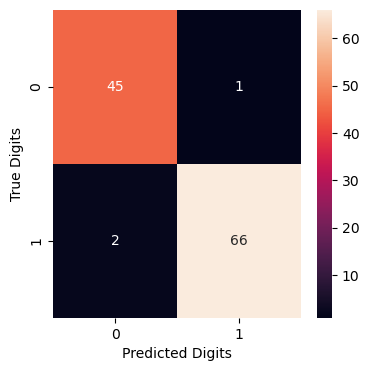

In [60]:
pred_stack_eval = stacking_model.predict(X_eval.values)
stack_acc_eval = accuracy_score(y_eval.values, pred_stack_eval)
print("StackingClassifier_eval accuracy is: {0:.3f}%".format(stack_acc_eval * 100))
cm = confusion_matrix(y_eval.values, pred_stack_eval)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()